### ML Mini - Project

You can choose a topic/dataset which discuss the following concepts:
Expected either Text/Image data or any dataset from current Kaggle/Hackathon Challenges.
Feature Extraction 
Pre-processing the Features
EDA
Modeling
Evaluation
Interpretation (Feature Importance)
Deploy (Optional)

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading Dataset

In [2]:
data = pd.read_csv('Loan_prediction_train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### Data expolaration

In [9]:
print("Shape of the Dataset: ",data.shape)

Shape of the Dataset:  (614, 13)


In [13]:
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [222]:
print("Counts of categorical values:")
for col in ['Gender','Married','Dependents','Education','Self_Employed',"Property_Area","Credit_History"]:
    print(col)
    display(data[col].value_counts())

Counts of categorical values:
Gender


Male      489
Female    112
Name: Gender, dtype: int64

Married


Yes    398
No     213
Name: Married, dtype: int64

Dependents


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed


No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Credit_History


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
print("Missing values in dataset:")
data.isna().sum()

Missing values in dataset:


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
print("No. of Unique values: ")
data.nunique()

No. of Unique values: 


Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [19]:
print("Values of Categorical Features:")
for col in data.iloc[:,2:]:
    if data[col].dtypes == 'O':
        print(">", col," :  ",data[col].unique())
        

Values of Categorical Features:
> Married  :   ['No' 'Yes' nan]
> Dependents  :   ['0' '1' '2' '3+' nan]
> Education  :   ['Graduate' 'Not Graduate']
> Self_Employed  :   ['No' 'Yes' nan]
> Property_Area  :   ['Urban' 'Rural' 'Semiurban']
> Loan_Status  :   ['Y' 'N']


## EDA

###### Pandas Profiling

In [19]:
# !pip install pandas-profiling

In [3]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report")

In [4]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
numerical_cols  = [col for col in data.columns  if data[col].dtypes != 'O']
numerical_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [6]:
categorical_cols  = [col for col in data.columns  if data[col].dtypes == 'O'  ]
categorical_cols.remove('Loan_ID')
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

###### Distribution of categorical features

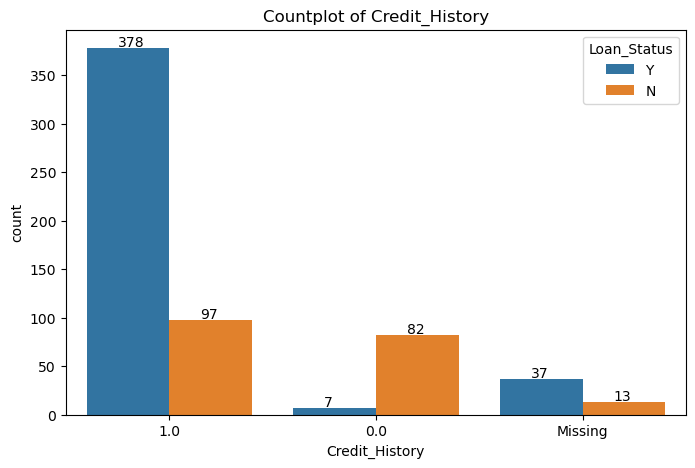

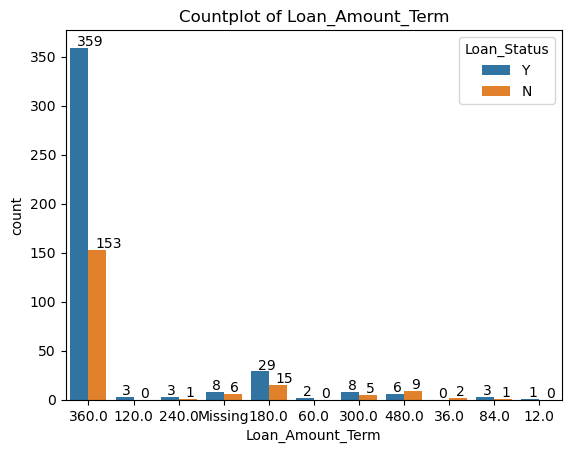

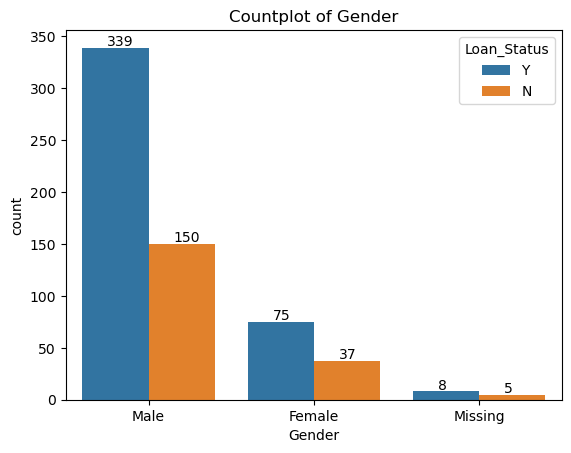

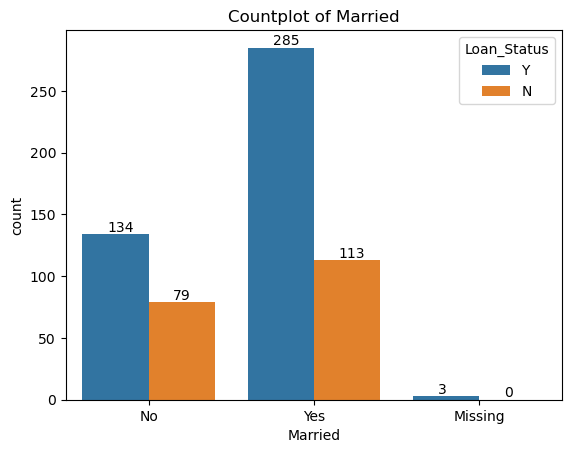

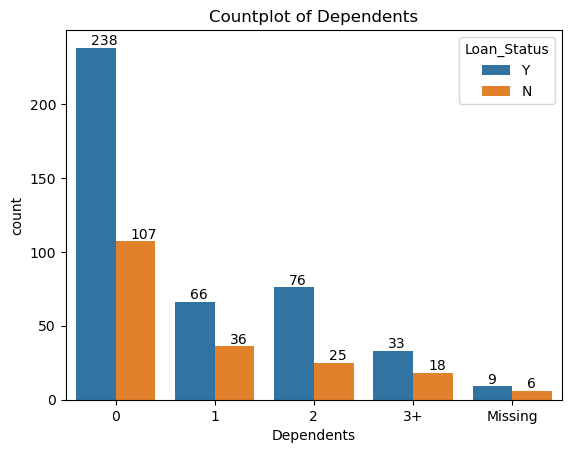

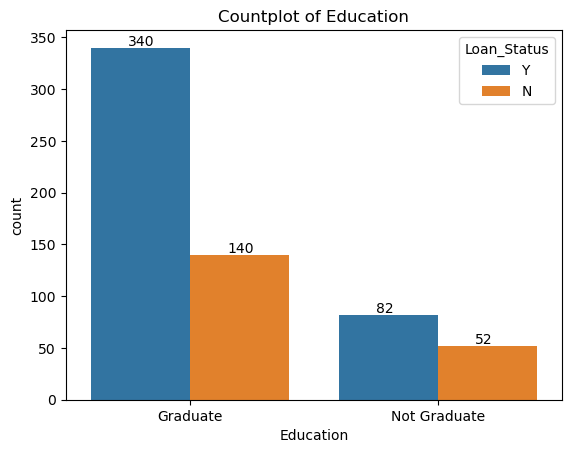

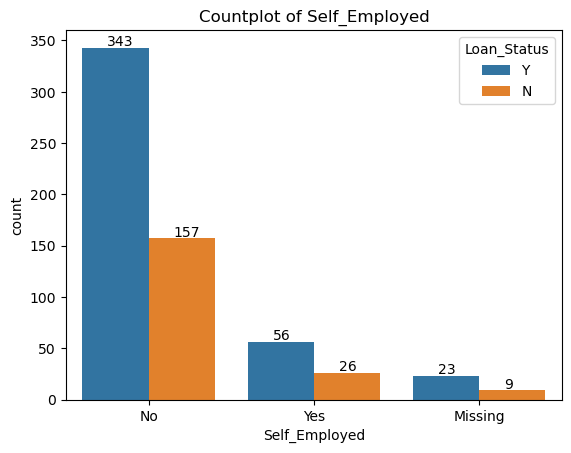

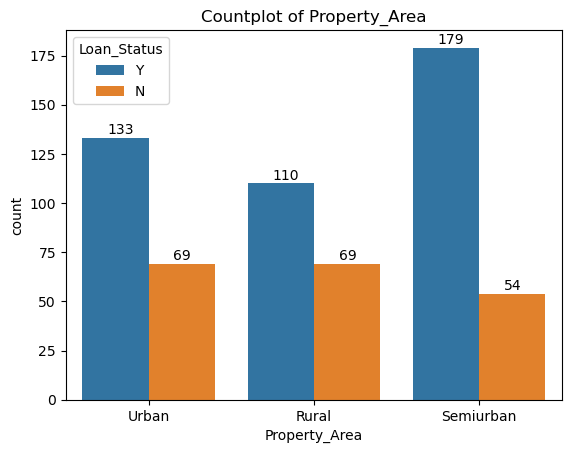

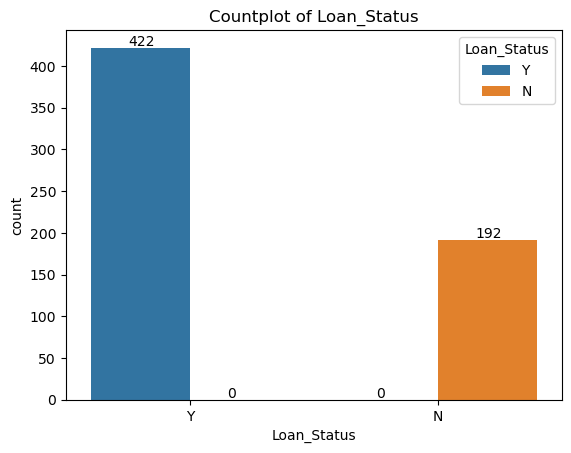

In [100]:
temp = data.fillna("Missing")
plt.figure(figsize=(8,5))
for col in ["Credit_History", 'Loan_Amount_Term']+categorical_cols:
    ax=sns.countplot(x=col, data=temp, hue='Loan_Status')
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2))
        ax.set(title="Countplot of "+col)
    plt.show()

**Inferences:**  
- Usually Loan approved for Credit_History 1.
- Most of them apply Loan for 360 term period


##### Distribution of numerical features

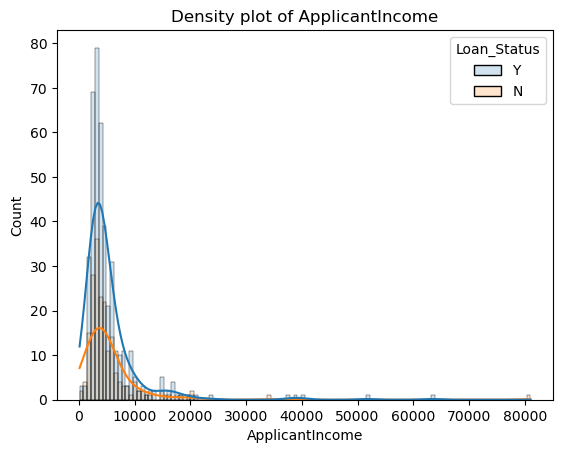

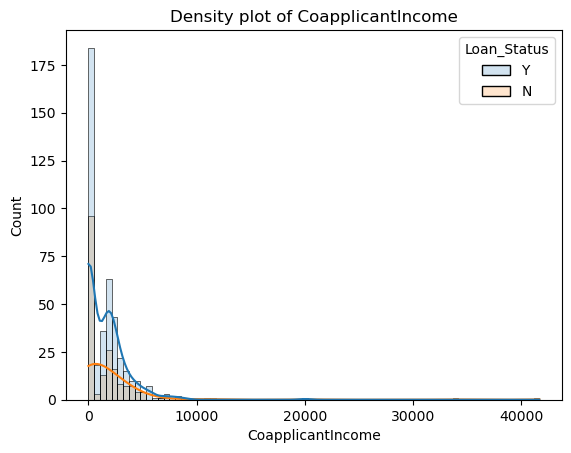

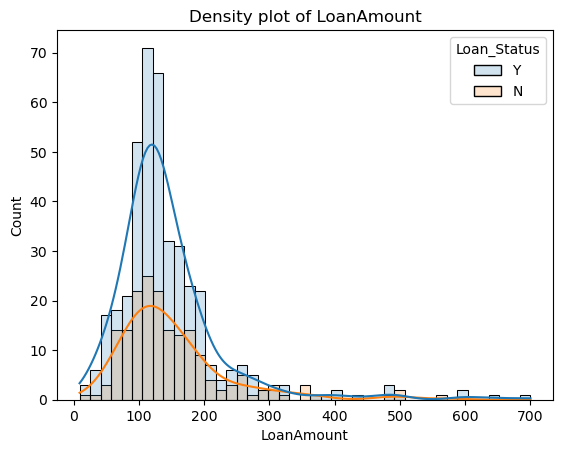

In [101]:
for col in numerical_cols[:-2]:
    sns.histplot(x=col, data=data, hue='Loan_Status', kde=True, alpha=0.2).set(title='Density plot of '+col)
    plt.show()

**Inference:**
- all of the numerical features are postively skewed

##### Box plots

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

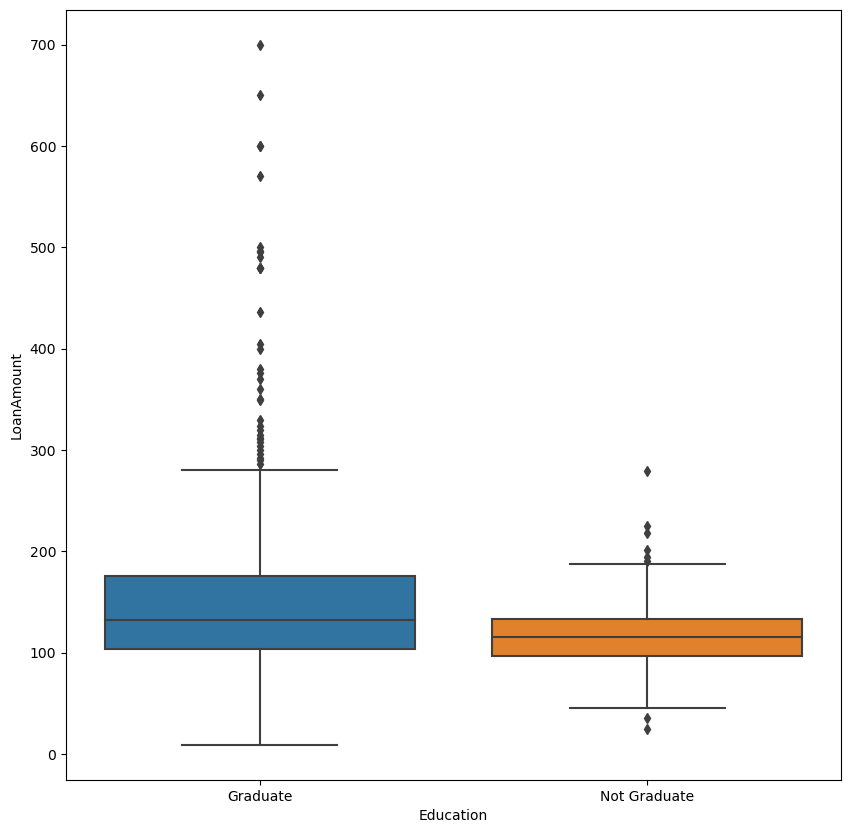

In [235]:
plt.figure(figsize=(10,10))

sns.boxplot(data=data, y="LoanAmount", x="Education")

- Graduates applied Higher Loan Amount

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

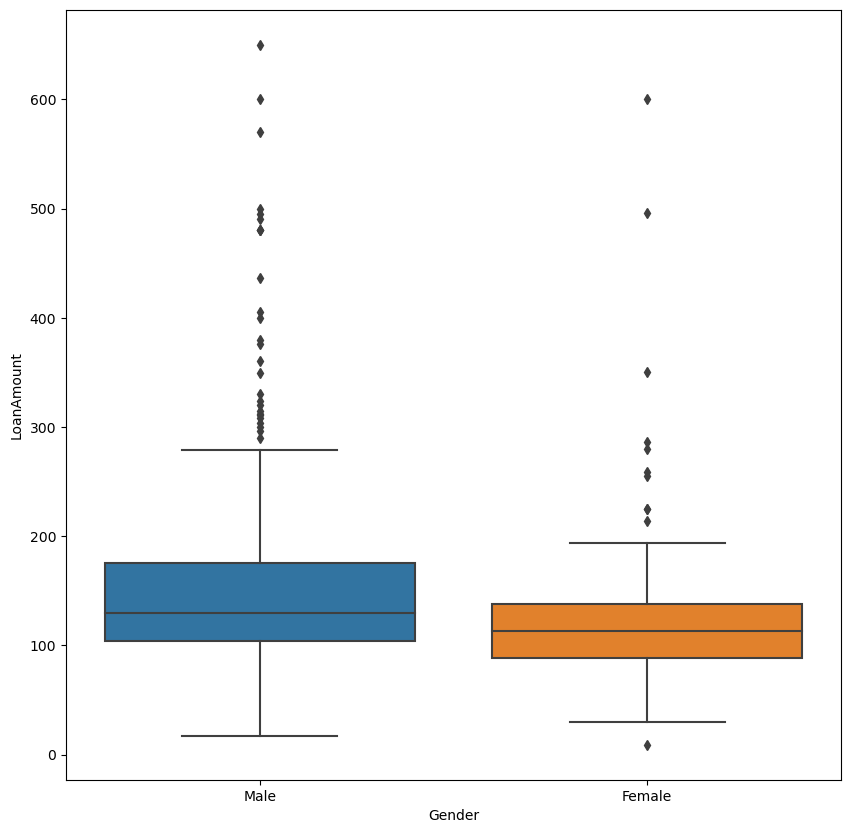

In [237]:
plt.figure(figsize=(10,10))

sns.boxplot(data=data, y="LoanAmount", x="Gender")

- Males applied for higher loan amount

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

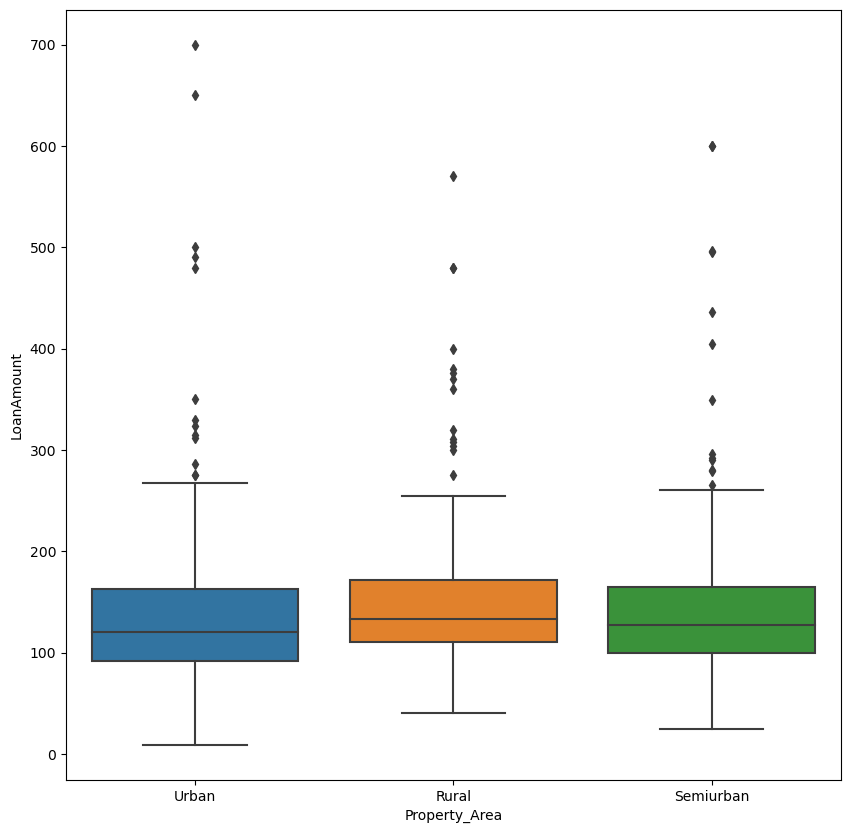

In [239]:
plt.figure(figsize=(10,10))

sns.boxplot(data=data, y="LoanAmount", x="Property_Area")

- Rural People applied for higher Loan Amount

<Figure size 2000x2000 with 0 Axes>

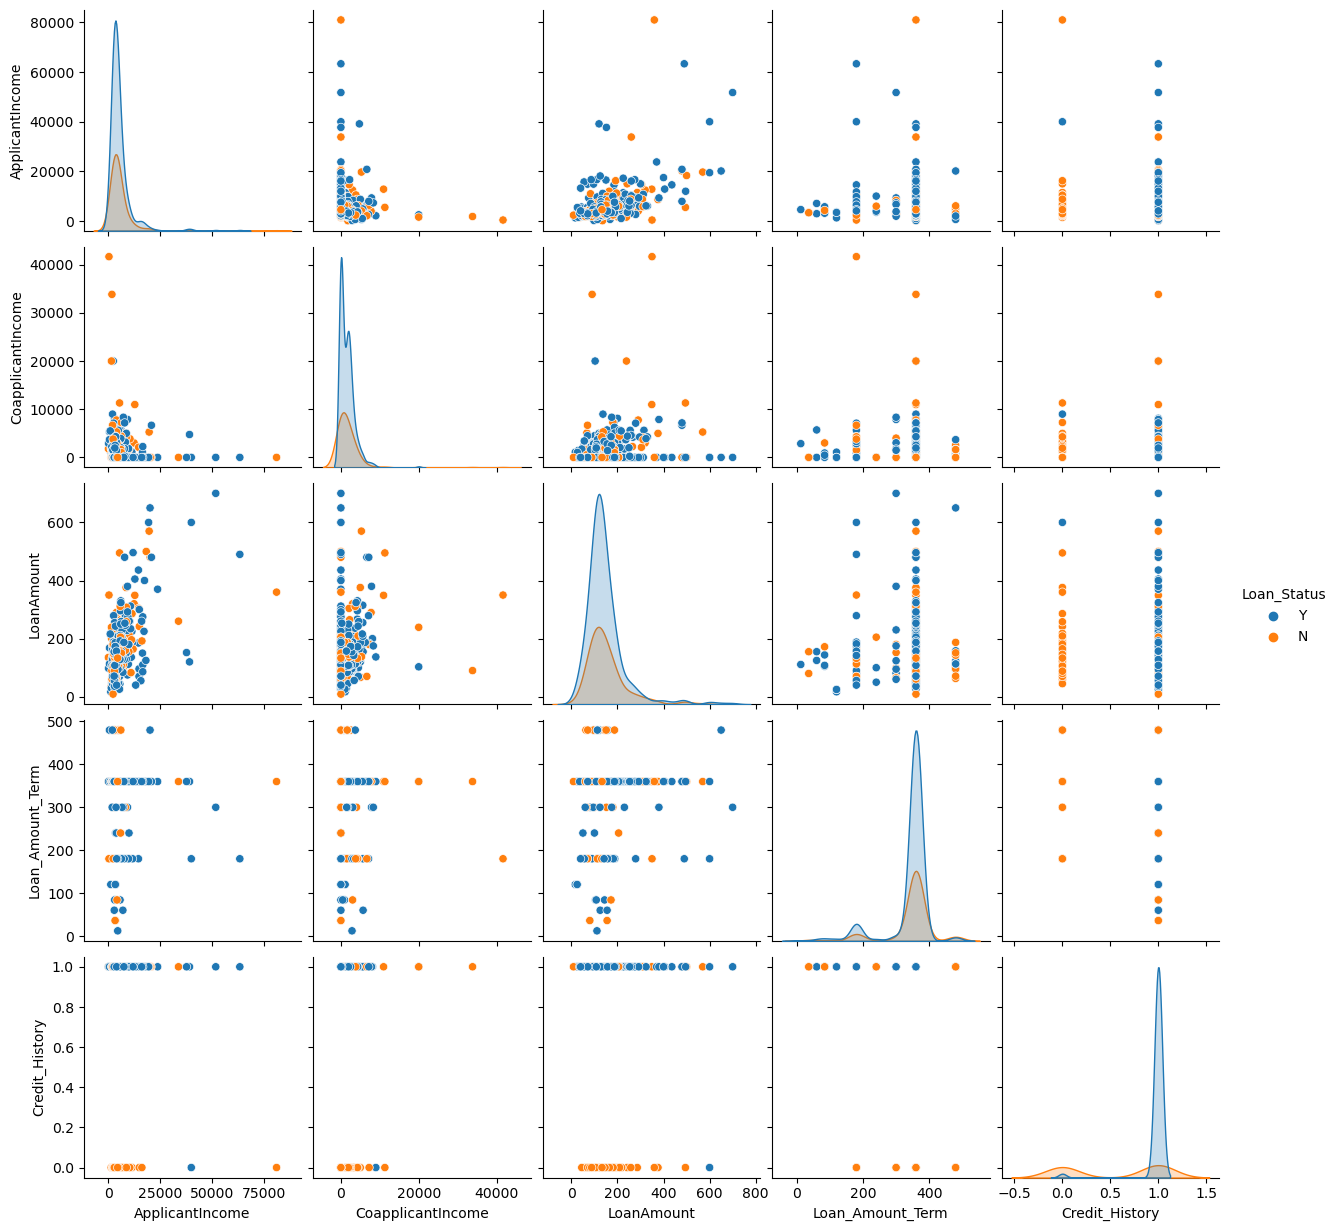

In [78]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data, hue="Loan_Status")
plt.show()

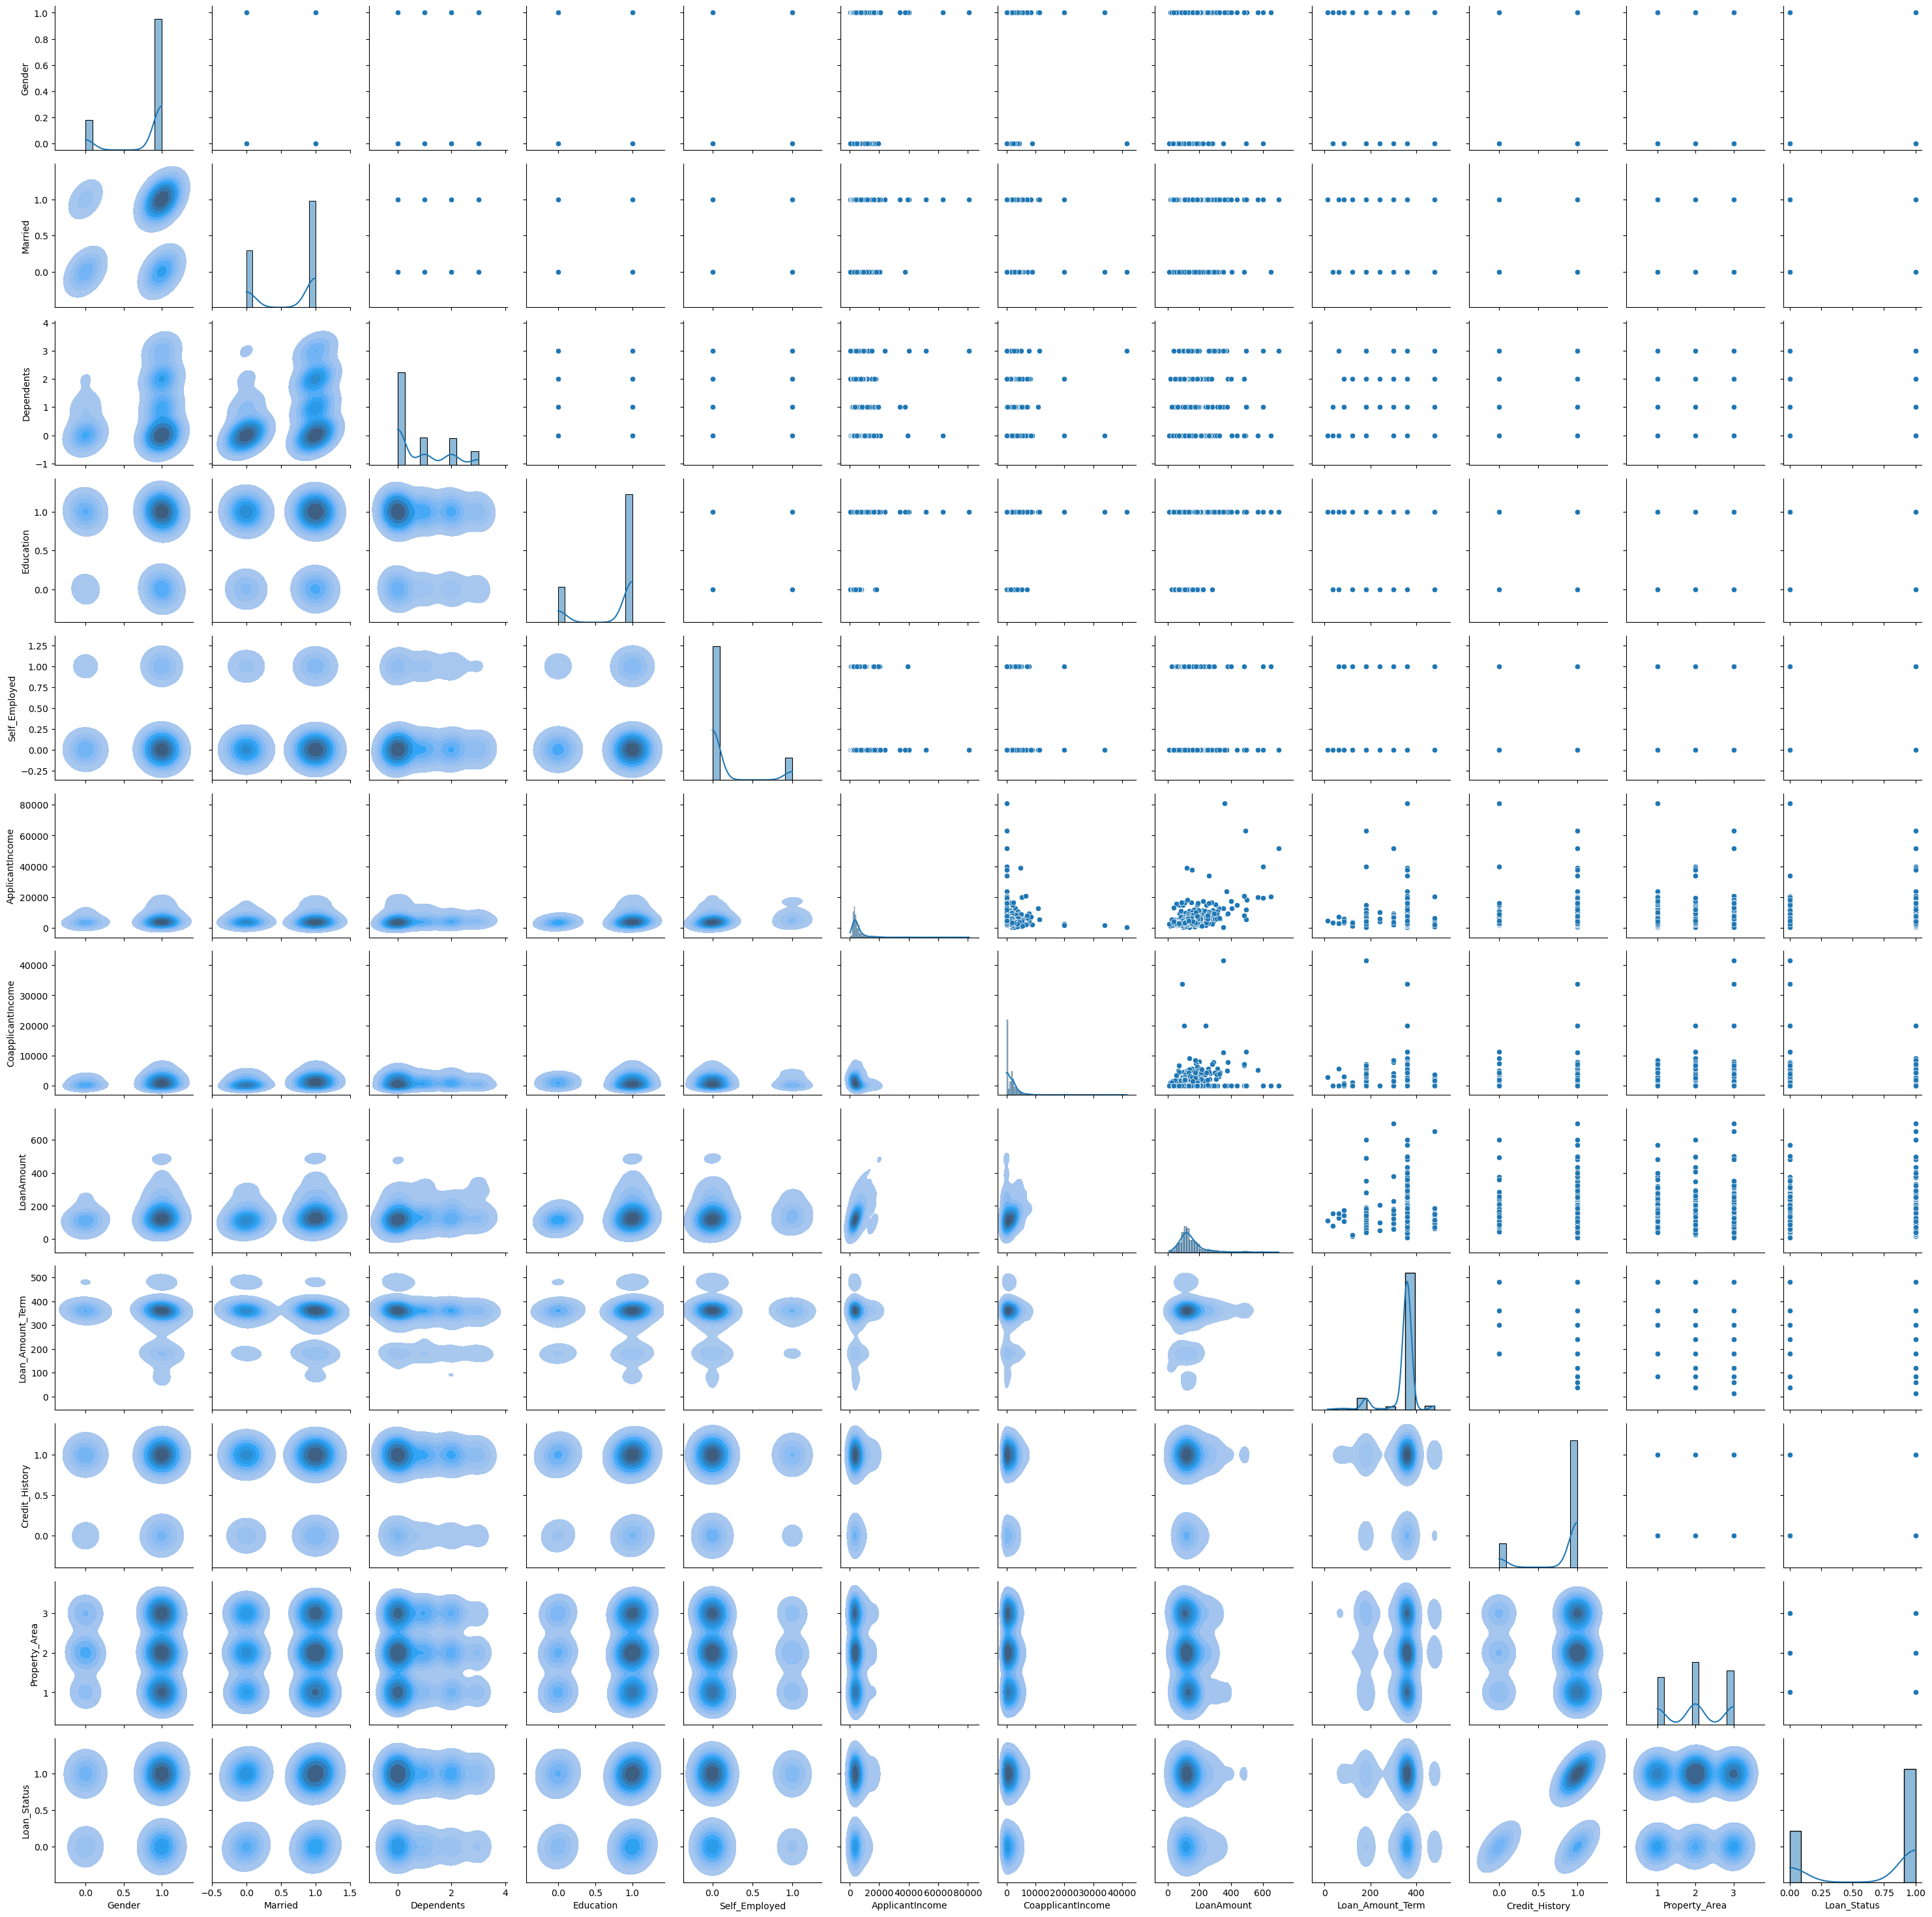

In [246]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot )
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)


## Pre-processing

### Encoding Categorical columns

In [7]:
### Saving a copy in df
df = data.copy()

In [8]:
enc = {
'Gender' : {'Female':0,'Male':1},
'Married' : {'No':0,'Yes':1},
'Education' : {'Not Graduate':0,'Graduate':1},
'Self_Employed' : {'No':0, 'Yes':1},
'Property_Area' : {'Urban':3,'Semiurban':2, 'Rural':1},
'Dependents' : {'0':0, '1':1,'2':2, '3+':3},
'Loan_Status': {'Y':1, 'N':0}
}
## encoding
for col in enc.keys():
    df[col] = df[col].map(enc[col])
    

In [364]:
### df - Encoded features but with missing values
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,3,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,3,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,3,1


In [9]:
columns_noMissing = list(data.dropna(axis=1).columns)
columns_Missing = set(list(data.columns))-set(columns_noMissing)
columns_Missing

{'Credit_History',
 'Dependents',
 'Gender',
 'LoanAmount',
 'Loan_Amount_Term',
 'Married',
 'Self_Employed'}

### Imputing missing Values for numerical columns

In [10]:
### df2 - df+ numerical missing values filled
df2 = df.copy()

- Filling `Loan_Amount_Term` with Mode and rest with Mean

In [11]:
### Filling Loan Amount Term with Mode and rest with mean

numerical_missings={}
for col in numerical_cols:
    if df2[col].dtypes != 'O' and col !='Credit_History':
        if col == 'Loan_Amount_Term':
            numerical_missings[col] = df2[col].mode()[0]
            df2[col] = df2[col].fillna(numerical_missings[col])
        else:    
            numerical_missings[col] = df2[col].mean()
            df2[col] = df2[col].fillna(numerical_missings[col])
        
numerical_missings

{'ApplicantIncome': 5403.459283387622,
 'CoapplicantIncome': 1621.245798027101,
 'LoanAmount': 146.41216216216216,
 'Loan_Amount_Term': 360.0}

In [12]:
df2.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Imputing missing values of categorical features

In [13]:
#### df3 - df2+ categorical missing values filled
df3 = df2.copy()

- Finding Votes for `Credit History` from other features.

In [52]:
## Finding Votes for `Credit History` from other features.
for col in categorical_cols:
    if col!='Credit_History':
        display(df2[[col, 'Credit_History']].groupby(col).median())

,Credit_History
Gender,
0.0,1.0
1.0,1.0


,Credit_History
Married,
0.0,1.0
1.0,1.0


,Credit_History
Dependents,
0.0,1.0
1.0,1.0
2.0,1.0
3.0,1.0


,Credit_History
Education,
0,1.0
1,1.0


,Credit_History
Self_Employed,
0.0,1.0
1.0,1.0


,Credit_History
Property_Area,
1,1.0
2,1.0
3,1.0


,Credit_History
Loan_Status,
0,1.0
1,1.0


: Filling missing cells of `Credit History` with 1.0

In [14]:
## Filling missing cells of Credit History with 1.0
df3['Credit_History']=df3['Credit_History'].fillna(1.0)


- Finding Votes for `Self_Employed` from other features.

In [81]:
## Finding Votes for Self_Employed from other features.
for col in categorical_cols:
    if col!='Self_Employed':
        display(df2[[col, 'Self_Employed']].groupby(col).mean())

,Self_Employed
Gender,
0.0,0.144231
1.0,0.135484


,Self_Employed
Married,
0.0,0.140704
1.0,0.142105


,Self_Employed
Dependents,
0.0,0.113497
1.0,0.208333
2.0,0.166667
3.0,0.142857


,Self_Employed
Education,
0,0.132812
1,0.143172


,Self_Employed
Property_Area,
1,0.153846
2,0.143498
3,0.126316


,Self_Employed
Loan_Status,
N,0.142077
Y,0.140351


: Filling missing cells of `Self_Employed` with False

In [15]:
## Filling missing cells of `Self_Employed` with 0.0
df3['Self_Employed']=df3['Self_Employed'].fillna(0.0)


- Finding Votes for `Dependents` from other features.

In [82]:
## Finding Votes for `Dependents` from other features.
for col in categorical_cols:
    if col!='Dependents':
        display(df2[[col, 'Dependents']].groupby(col).mean())

,Dependents
Gender,
0.0,0.385321
1.0,0.840671


,Dependents
Married,
0.0,0.287081
1.0,1.017949


,Dependents
Education,
0,0.876923
1,0.731343


,Dependents
Self_Employed,
0.0,0.743326
1.0,0.912500


,Dependents
Property_Area,
1,0.751412
2,0.766520
3,0.769231


,Dependents
Loan_Status,
N,0.752688
Y,0.767554


**Missing values of `Dependents` can be set as 1 when `Married` is True**

In [16]:
## Filling missing values of Married as True
df3['Married'].fillna(1, inplace=True)


In [17]:
## Missing values of Dependents can be set as 1 when Married is True
df3.loc[df3['Dependents'].isnull(),'Dependents'] = df3.loc[df3['Dependents'].isnull(),'Married']

* Filling Missing Values `Gender` randomly

In [18]:
df3['Gender'].fillna(np.random.randint(0,1), inplace=True)

In [19]:
df3.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [118]:
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,3,1


## Modelling

In [20]:
## Libraries
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [21]:
### Features and Target split
X=df3.drop(["Loan_Status", "Loan_ID"], axis=1)
y=df3.Loan_Status


##### Scaling

In [22]:
### Scaling numerical columns
sc = StandardScaler()
sc.fit(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = sc.transform(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

##### Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

## > Support Vector Machine - Model 1

In [380]:
temp = df3.dropna()
X=temp.iloc[:,2:-1]
y=temp.iloc[:,-1]
sc = StandardScaler()
sc.fit(X[numerical_cols])
X[numerical_cols] = sc.transform(X[numerical_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [381]:
## Training
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [382]:
## Performance on Train set
print("Accuracy on train data :", clf.score(X_train, y_train)*100,"%")
print("Train data F1 Score :", f1_score(y_train, clf.predict(X_train), average='macro'))

Accuracy on train data : 80.65217391304348 %
Train data F1 Score : 0.7263350690846864


In [383]:
## Prediction Permformance
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("F1 Score :", f1_score(y_test, preds, average='macro'))

Accuracy on test data:  83.76623376623377 %
F1 Score : 0.7712010459380757


In [77]:
## Applying SMOTE
# X_train, y_train = SMOTE().fit_resample(X_train, y_train)

**K-Fold CV**

In [84]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(svm.SVC(), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(clf)
print(scores)
print('Mean Accuracy: %.3f' % np.mean(scores))
print()

SVC()
[0.77083333 0.75       0.8125     0.83333333 0.77083333 0.83333333
 0.8125     0.8125     0.79166667 0.83333333 0.70833333 0.83333333
 0.83333333 0.75       0.79166667 0.8125     0.79166667 0.79166667
 0.875      0.85416667 0.875      0.8125     0.77083333 0.77083333
 0.77083333 0.83333333 0.72916667 0.8125     0.77083333 0.89583333]
Mean Accuracy: 0.803



**Tuning**

In [85]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 

print("Accuracy on train data :", grid.score(X_train, y_train)*100,"%")
print("Train data F1 Score :", f1_score(y_train, grid.predict(X_train), average='macro'))
print()
preds = grid.predict(X_test)
score = grid.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("Test data F1 Score :", f1_score(y_test, grid.predict(X_test), average='macro'))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy on train data : 84.44444444444444 %
Train data F1 Score : 0.7894385026737967

Accuracy on test data:  81.66666666666667 %
Test data F1 Score : 0.7371565113500598


In [34]:
print(classification_report(y_test, preds)) 
print("Precision :", precision_score(y_test, preds, average='macro'))
print("Recall :", recall_score(y_test, preds, average='macro'))

              precision    recall  f1-score   support

           0       0.94      0.43      0.59        37
           1       0.80      0.99      0.88        83

    accuracy                           0.82       120
   macro avg       0.87      0.71      0.74       120
weighted avg       0.84      0.82      0.79       120

Precision : 0.868646487721302
Recall : 0.710192119830674


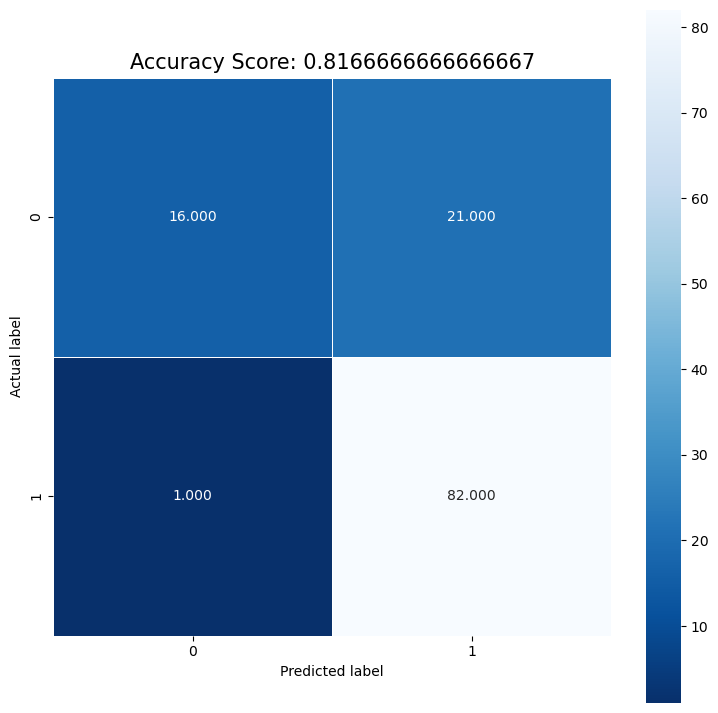

In [35]:
## Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [37]:
## storing best svm model
svm_model = grid

#### SVC Performance
- Train set: Acccuracy - 84.44%, F1 - 0.78  
- Test set:  Accuracy -  81.66%, F1 - 0.73

## > Naive Bayes - Model 2

In [384]:
temp = df.dropna()
X=temp.iloc[:,2:-1]
y=temp.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [385]:
## Training
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
clf = GNBclf.fit(X_train, y_train)


In [386]:
## Performance on Train data
print("Accuracy on train data :", clf.score(X_train, y_train))
print("Train data F1 Score :", f1_score(y_train, clf.predict(X_train), average='macro'))

Accuracy on train data : 0.8055555555555556
Train data F1 Score : 0.7426365456105232


In [387]:
## Prediction Permformance
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("F1 Score :", f1_score(y_test, preds, average='macro'))

Accuracy on test data:  80.0 %
F1 Score : 0.7333333333333334


**K-Fold CV**

In [91]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(clf)
print(scores)
print('Mean Accuracy: %.3f' % np.mean(scores))
print()

GaussianNB()
[0.72916667 0.72916667 0.8125     0.8125     0.75       0.8125
 0.83333333 0.85416667 0.8125     0.79166667 0.6875     0.8125
 0.83333333 0.77083333 0.72916667 0.83333333 0.8125     0.77083333
 0.875      0.8125     0.89583333 0.8125     0.72916667 0.79166667
 0.72916667 0.8125     0.75       0.77083333 0.75       0.89583333]
Mean Accuracy: 0.794



In [90]:
## Applying SMOTE
#X_train, y_train = SMOTE().fit_resample(X_train, y_train)

**Tuning**

In [97]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 

print("Accuracy on train data :", grid.score(X_train, y_train)*100,"%")
print("Train data F1 Score :", f1_score(y_train, grid.predict(X_train), average='macro'))
print()
preds = grid.predict(X_test)
score = grid.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("Test data F1 Score :", f1_score(y_test, grid.predict(X_test), average='macro'))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 1.873817422860387e-09}
Accuracy on train data : 80.27777777777779 %
Train data F1 Score : 0.739902921512959

Accuracy on test data:  80.0 %
Test data F1 Score : 0.7333333333333334


**Classification Report**

In [ ]:
print(classification_report(y_test, preds)) 
print("Precision :", precision_score(y_test, preds, average='macro'))
print("Recall :", recall_score(y_test, preds, average='macro'))

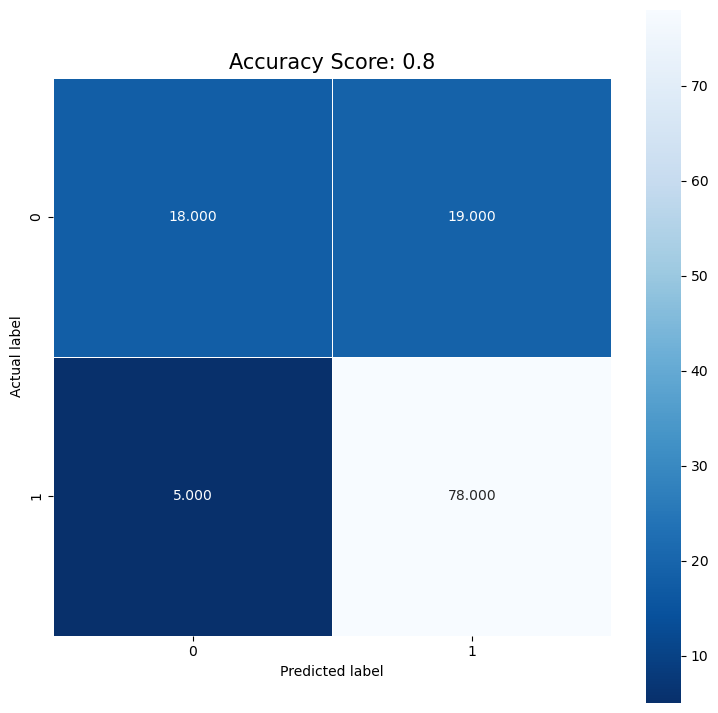

In [41]:
## Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
## storing best svm model
naiveBayes_model = grid

In [ ]:
#### Naive Bayes Performance
- Train set: Acccuracy - 84.44%, F1 - 0.78  
- Test set:  Accuracy -  81.66%, F1 - 0.73

## Logistic Regression - Model 3

In [272]:
temp = df3.dropna()
X=temp.iloc[:,2:-1]
y=temp.iloc[:,-1]
sc = StandardScaler()
# sc.fit(X[numerical_cols])
# X[numerical_cols] = sc.transform(X[numerical_cols])
sc.fit(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = sc.transform(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [355]:
## Training
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [356]:
## Performance on Training set
print("Accuracy on train data :", clf.score(X_train, y_train))
print("Train data F1 Score :", f1_score(y_train, clf.predict(X_train), average='macro'))

Accuracy on train data : 0.8043478260869565
Train data F1 Score : 0.7223340040241449


In [357]:
## Prediction Performance
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("F1 Score :", f1_score(y_test, preds, average='macro'))

Accuracy on test data:  83.11688311688312 %
F1 Score : 0.7687687687687688


**K-Fold CV**

In [111]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(clf)
print(scores)
print('Mean Accuracy: %.3f' % np.mean(scores))
print()

LogisticRegression()
[0.79032258 0.83870968 0.85483871 0.80645161 0.83606557 0.75409836
 0.78688525 0.83606557 0.80327869 0.78688525 0.79032258 0.80645161
 0.83870968 0.79032258 0.83606557 0.81967213 0.81967213 0.85245902
 0.75409836 0.78688525 0.82258065 0.82258065 0.80645161 0.80645161
 0.80327869 0.75409836 0.81967213 0.81967213 0.80327869 0.81967213]
Mean Accuracy: 0.809



In [115]:
## Applying SMOTE
#X_train, y_train = SMOTE().fit_resample(X_train, y_train)

**Tuning**

In [125]:
param_grid = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'C' : [100, 10, 1.0, 0.1, 0.01]
}

grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 

print("Accuracy on train data :", grid.score(X_train, y_train)*100,"%")
print("Train data F1 Score :", f1_score(y_train, grid.predict(X_train), average='macro'))
print()
preds = grid.predict(X_test)
score = grid.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("Test data F1 Score :", f1_score(y_test, grid.predict(X_test), average='macro'))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'C': 100, 'solver': 'newton-cg'}
Accuracy on train data : 80.43478260869566 %
Train data F1 Score : 0.7223340040241449

Accuracy on test data:  83.76623376623377 %
Test data F1 Score : 0.7755756339259691


#### Classification Report

In [ ]:
print(classification_report(y_test, preds)) 
print("Precision :", precision_score(y_test, preds, average='macro'))
print("Recall :", recall_score(y_test, preds, average='macro'))

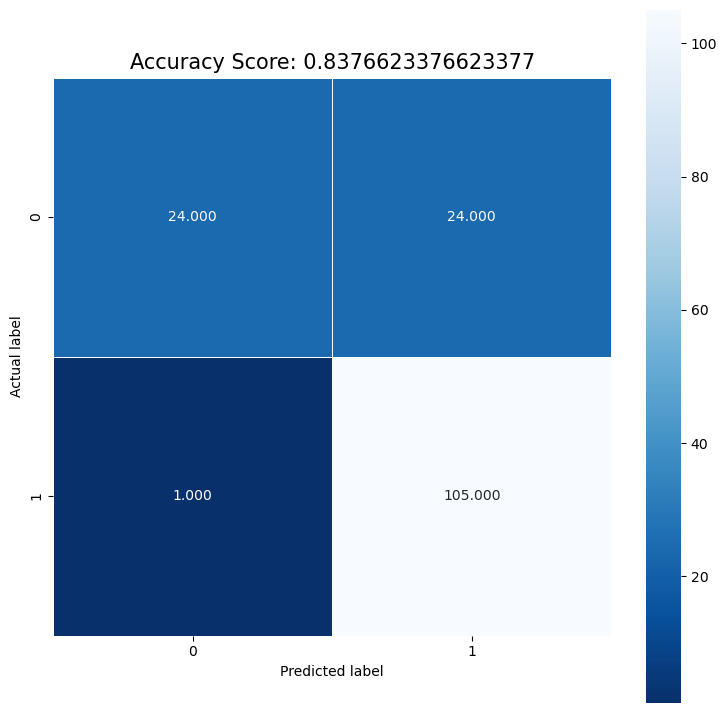

In [126]:
## Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [127]:
## storing best svm model
LogR_model = grid

In [ ]:
#### Naive Bayes Performance
- Train set: Acccuracy - 84.44%, F1 - 0.78  
- Test set:  Accuracy -  81.66%, F1 - 0.73

## KNN - Model 4

In [145]:
temp = df3.dropna()
X=temp.iloc[:,2:-1]
y=temp.iloc[:,-1]
sc = StandardScaler()
sc.fit(X[numerical_cols])
X[numerical_cols] = sc.transform(X[numerical_cols])
# sc.fit(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
# X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = sc.transform(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [146]:
## Training
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [147]:
## Performance on TRaining set
print("Accuracy on train data :", clf.score(X_train, y_train))
print("Train data F1 Score :", f1_score(y_train, clf.predict(X_train), average='macro'))

Accuracy on train data : 0.8021739130434783
Train data F1 Score : 0.7273301676014043


In [172]:
## Prediction
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("Precision :", precision_score(y_test, preds, average='macro'))
print("Recall :", recall_score(y_test, preds, average='macro'))
print("F1 Score :", f1_score(y_test, preds, average='macro'))

Accuracy on test data:  82.46753246753246 %
F1 Score : 0.7576216846400468


**K-Fold CV**

In [150]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(clf)
print(scores)
print('Mean Accuracy: %.3f' % np.mean(scores))
print()

KNeighborsClassifier(n_neighbors=10)
[0.79032258 0.83870968 0.82258065 0.79032258 0.81967213 0.73770492
 0.7704918  0.83606557 0.80327869 0.72131148 0.80645161 0.77419355
 0.83870968 0.77419355 0.80327869 0.72131148 0.81967213 0.83606557
 0.72131148 0.7704918  0.82258065 0.82258065 0.82258065 0.75806452
 0.78688525 0.7704918  0.83606557 0.81967213 0.7704918  0.81967213]
Mean Accuracy: 0.794



**Finding Best K neighbours**

Best K -  10


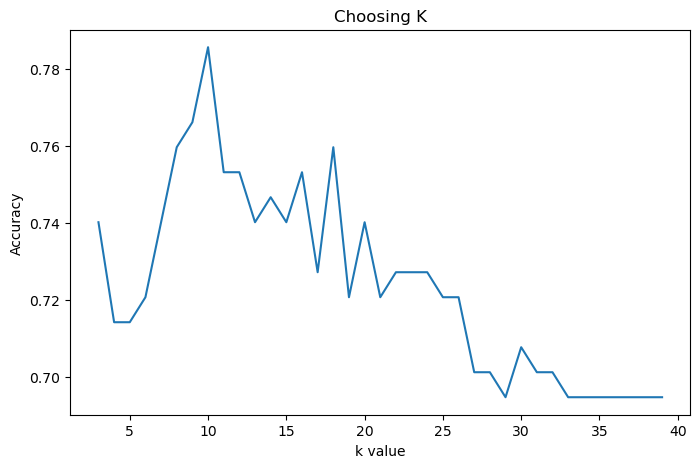

In [150]:
## Finding Best K
x=[]
y=[]
for i in range(3,40):
    knn_temp = KNeighborsClassifier(n_neighbors=i)
    knn_temp.fit(X_train, y_train)
    preds = knn_temp.predict(X_test)
    score = knn_temp.score(X_test, y_test)
    x.append(i)
    y.append(score)


plt.figure(figsize=(8,5))
plt.plot(x,y)
plt.ylabel('Accuracy')
plt.xlabel('k value')
plt.title("Choosing K");

print("Best K - ", x[np.argmax(y)])

**Classification Report**

In [ ]:
print(classification_report(y_test, preds)) 
print("Precision :", precision_score(y_test, preds, average='macro'))
print("Recall :", recall_score(y_test, preds, average='macro'))

In [ ]:
## Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

--------------------------------------------------

## Decision Tree - Model 5

In [393]:
temp = df3.dropna()
X=temp.iloc[:,2:-1]
y=temp.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [394]:
## Training
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_leaf=16)
clf = clf.fit(X_train, y_train)

In [395]:
## Performance on training set
print("Accuracy on train data :", clf.score(X_train, y_train))
print("Train data F1 Score :", f1_score(y_train, clf.predict(X_train), average='macro'))

Accuracy on train data : 0.8021739130434783
Train data F1 Score : 0.7323101518784971


In [391]:
## Prediction Permformance
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("F1 Score :", f1_score(y_test, preds, average='macro'))

Accuracy on test data:  82.46753246753246 %
F1 Score : 0.7576216846400468


**K-Fold CV**

In [180]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(tree.DecisionTreeClassifier(min_samples_leaf=16), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(clf)
print(scores)
print('Mean Accuracy: %.3f' % np.mean(scores))
print()

DecisionTreeClassifier(min_samples_leaf=16)
[0.79032258 0.82258065 0.83870968 0.77419355 0.7704918  0.68852459
 0.75409836 0.83606557 0.80327869 0.73770492 0.75806452 0.80645161
 0.82258065 0.77419355 0.81967213 0.78688525 0.81967213 0.75409836
 0.70491803 0.75409836 0.80645161 0.82258065 0.74193548 0.79032258
 0.7704918  0.72131148 0.80327869 0.78688525 0.80327869 0.78688525]
Mean Accuracy: 0.782



**SMOTE**

In [191]:
## Applying SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

**Tuning**

In [205]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [2,3,4,5,6, 8, 9,10,16,20,25,26,28,29,30,35],
              'criterion' :['gini', 'entropy'],
              'splitter': ['best', 'random'],
              
              
             }

grid = GridSearchCV( tree.DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 

print("Accuracy on train data :", grid.score(X_train, y_train)*100,"%")
print("Train data F1 Score :", f1_score(y_train, grid.predict(X_train), average='macro'))
print()
preds = grid.predict(X_test)
score = grid.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("Test data F1 Score :", f1_score(y_test, grid.predict(X_test), average='macro'))


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'splitter': 'random'}
Accuracy on train data : 80.21739130434783 %
Train data F1 Score : 0.718302276596747

Accuracy on test data:  83.11688311688312 %
Test data F1 Score : 0.7643596986817326


**Classification Report**

In [206]:
print(classification_report(y_test, preds)) 
print("Precision :", precision_score(y_test, preds, average='macro'))
print("Recall :", recall_score(y_test, preds, average='macro'))

              precision    recall  f1-score   support

           0       0.96      0.48      0.64        48
           1       0.81      0.99      0.89       106

    accuracy                           0.83       154
   macro avg       0.88      0.73      0.76       154
weighted avg       0.85      0.83      0.81       154

Precision : 0.8830128205128205
Recall : 0.7348663522012578


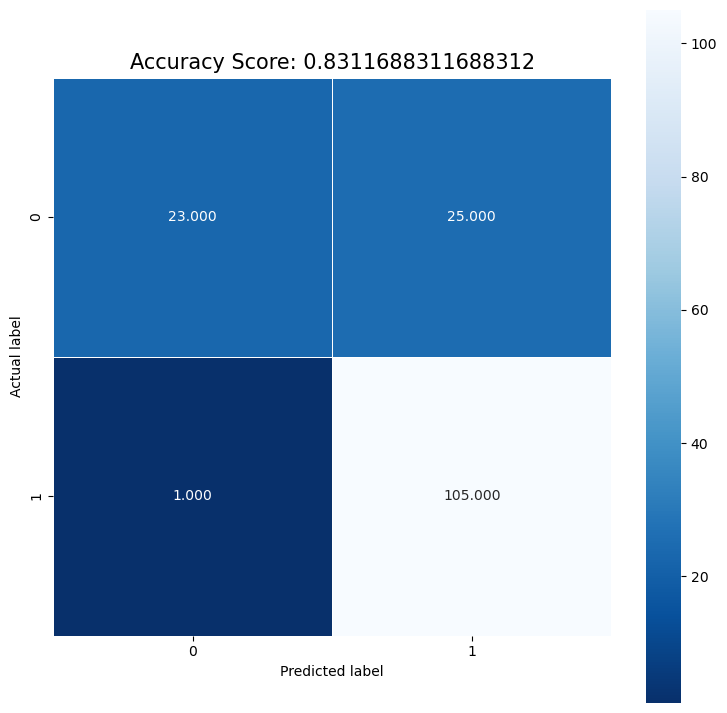

In [207]:
## Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [208]:
dtr_model = grid

**Visualing the Tree**

In [239]:
#!pip install dtreeviz

In [157]:
import graphviz

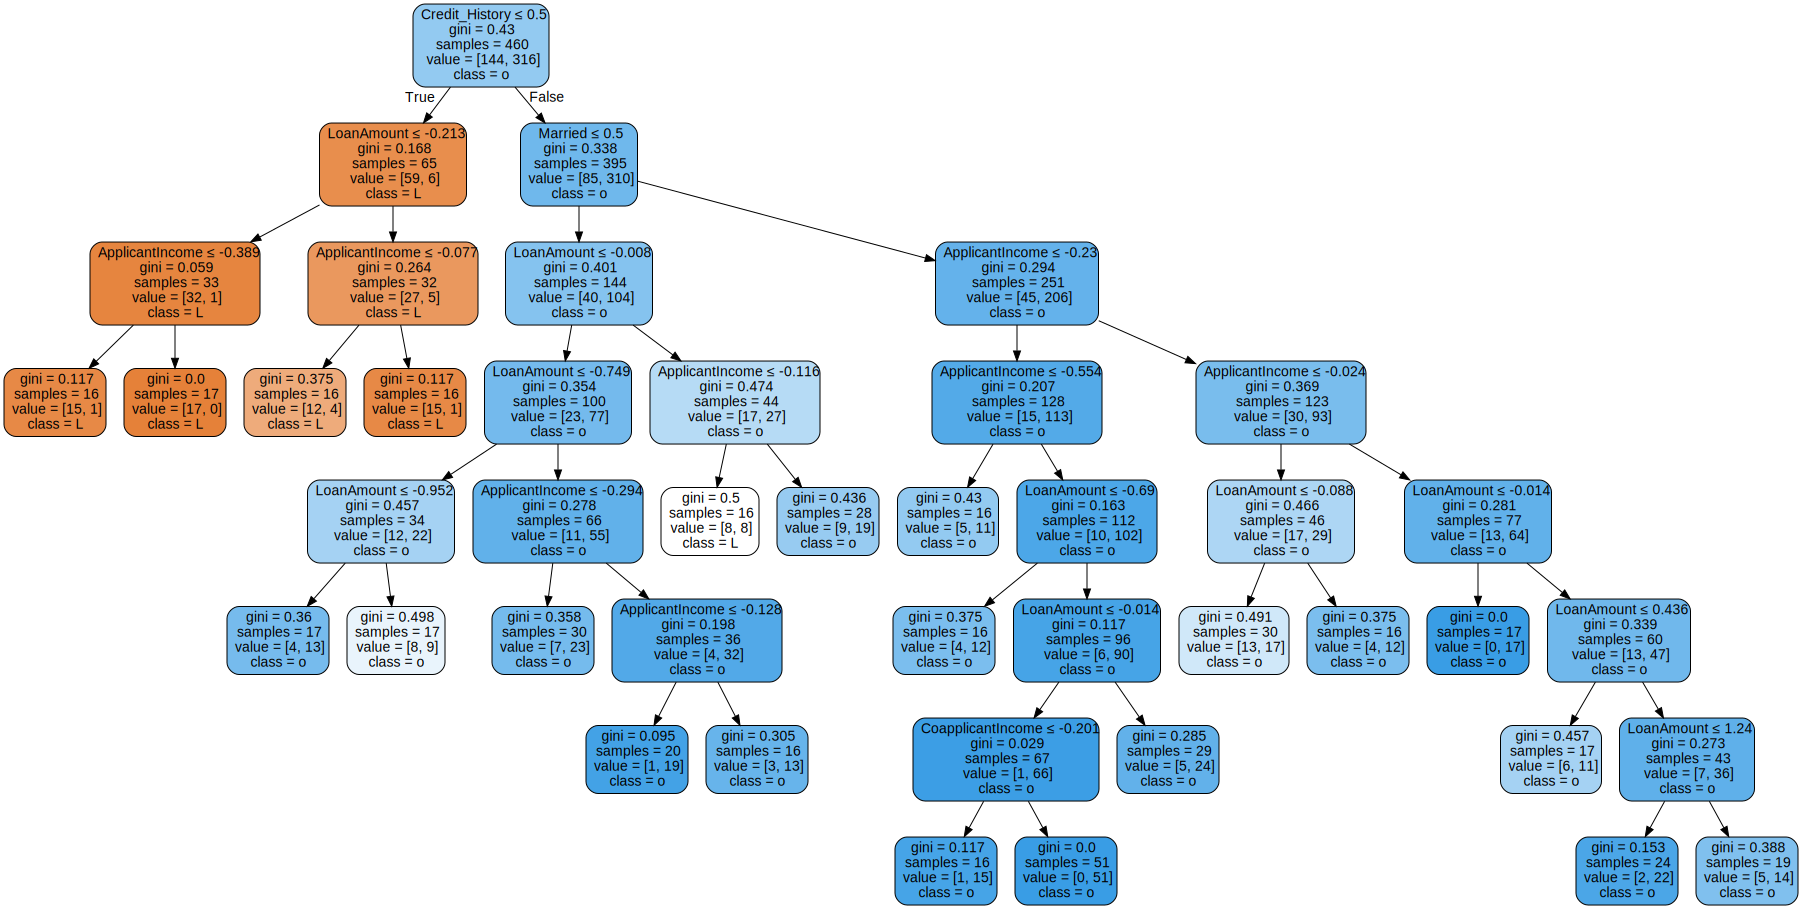

In [160]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=data.columns[2:-1],  
                     class_names=data.columns[-1],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [158]:
from dtreeviz.trees import *

In [159]:
viz = dtreeviz(clf,
               X_train,
               y_train,
               target_name='Loan_Status')
              
viz.view()  

C:\Users\Msc 2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Random Forest - Model 6

In [209]:
temp = df3.dropna()
X=temp.iloc[:,2:-1]
y=temp.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [210]:
## Training
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_estimators=60)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

In [211]:
## Training Performance
print("Accuracy on train data :", clf.score(X_train, y_train))
print("Train data F1 Score :", f1_score(y_train, clf.predict(X_train), average='macro'))

Accuracy on train data : 0.9978260869565218
Train data F1 Score : 0.9974679503057726


In [212]:
## Prediction Performance
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("F1 Score :", f1_score(y_test, preds, average='macro'))

Accuracy on test data:  79.22077922077922 %
F1 Score : 0.7380952380952381


**SMOTE**

In [ ]:
## Applying SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

**Tuning**

In [216]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [4, 8, 9,10,20,22, 25,30],
              'criterion' :['gini', 'entropy'],
              'n_estimators':[30,50,55,58,60,62,63,65,70]
              
             }

grid = GridSearchCV( RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 

print("Accuracy on train data :", grid.score(X_train, y_train)*100,"%")
print("Train data F1 Score :", f1_score(y_train, grid.predict(X_train), average='macro'))
print()
preds = grid.predict(X_test)
score = grid.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("Test data F1 Score :", f1_score(y_test, grid.predict(X_test), average='macro'))


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 62}
Accuracy on train data : 81.30434782608695 %
Train data F1 Score : 0.738158904980011

Accuracy on test data:  83.11688311688312 %
Test data F1 Score : 0.7643596986817326


**Classification Report**

In [230]:
print(classification_report(y_test, preds)) 
print("Precision :", precision_score(y_test, preds, average='macro'))
print("Recall :", recall_score(y_test, preds, average='macro'))

              precision    recall  f1-score   support

           0       0.96      0.48      0.64        48
           1       0.81      0.99      0.89       106

    accuracy                           0.83       154
   macro avg       0.88      0.73      0.76       154
weighted avg       0.85      0.83      0.81       154

Precision : 0.8830128205128205
Recall : 0.7348663522012578


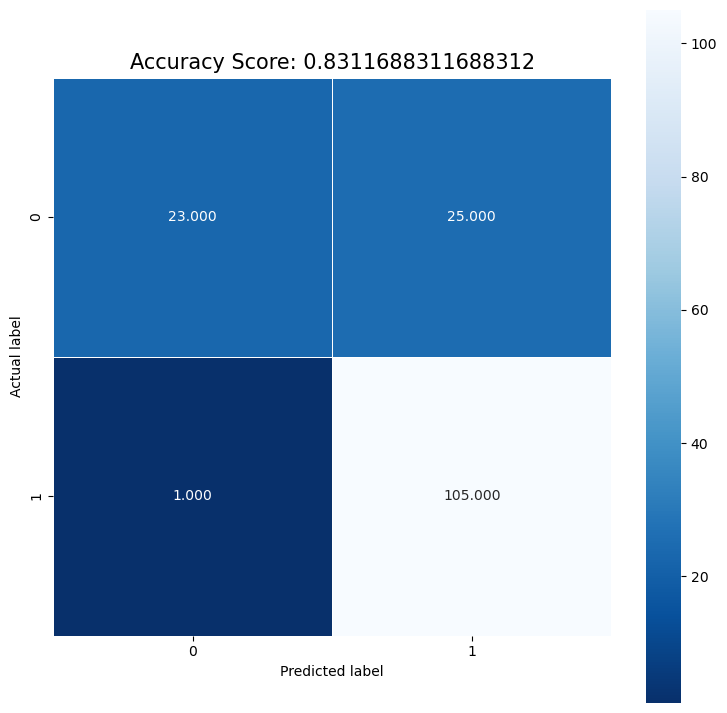

In [231]:
## Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### AdaBoost

In [406]:
temp = df3.dropna()
X=temp.iloc[:,2:-1]
y=temp.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [416]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=30, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=30, random_state=0)

In [417]:
## Training Performance
print("Accuracy on train data :", clf.score(X_train, y_train))
print("Train data F1 Score :", f1_score(y_train, clf.predict(X_train), average='macro'))

Accuracy on train data : 0.8217391304347826
Train data F1 Score : 0.7565760603009886


In [418]:
## Prediction Performance
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("F1 Score :", f1_score(y_test, preds, average='macro'))

Accuracy on test data:  81.81818181818183 %
F1 Score : 0.7596432552954293


In [422]:
param_grid = { 'base_estimator':[svm.SVC(),  GaussianNB(), LogisticRegression()],
              'n_estimators':[30,35,40,45,50,55,60], 
              'learning_rate':[1.0,0.5,0.1,0.2]
              
             }

grid = GridSearchCV( AdaBoostClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 

print("Accuracy on train data :", grid.score(X_train, y_train)*100,"%")
print("Train data F1 Score :", f1_score(y_train, grid.predict(X_train), average='macro'))
print()
preds = grid.predict(X_test)
score = grid.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("Test data F1 Score :", f1_score(y_test, grid.predict(X_test), average='macro'))


Fitting 5 folds for each of 84 candidates, totalling 420 fits
{'base_estimator': GaussianNB(), 'learning_rate': 0.1, 'n_estimators': 30}
Accuracy on train data : 80.21739130434783 %
Train data F1 Score : 0.7201852953562524

Accuracy on test data:  84.4155844155844 %
Test data F1 Score : 0.7824858757062148


C:\Users\Msc 2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Msc 2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Msc 2\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 506, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\Msc 2\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 147, in fit
    self._validate_estimator()
  File "C:\Users\M

In [423]:
print(classification_report(y_test, preds)) 
print("Precision :", precision_score(y_test, preds, average='macro'))
print("Recall :", recall_score(y_test, preds, average='macro'))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        48
           1       0.82      1.00      0.90       106

    accuracy                           0.84       154
   macro avg       0.91      0.75      0.78       154
weighted avg       0.87      0.84      0.83       154

Precision : 0.9076923076923077
Recall : 0.75


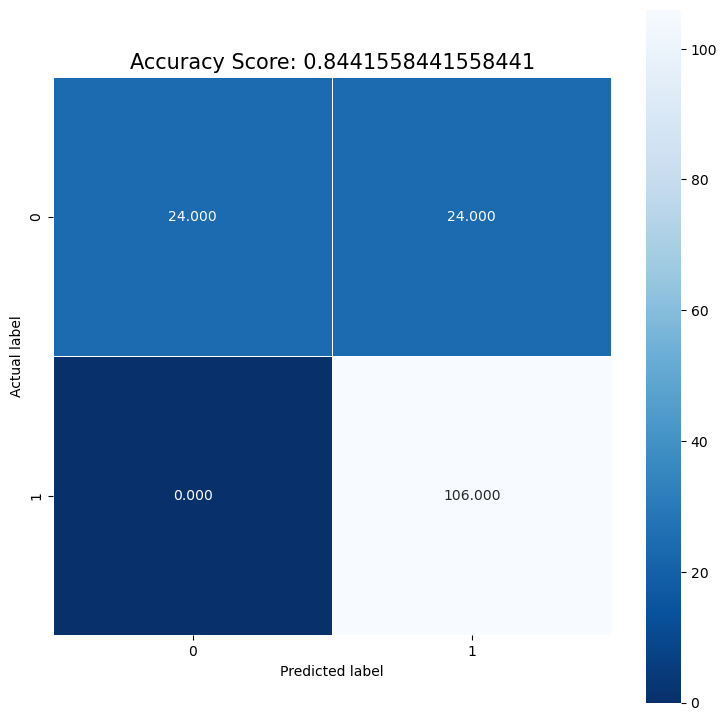

In [424]:
## Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### XG Boost  

In [24]:
temp = df3.dropna()
X=temp.iloc[:,2:-1]
y=temp.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [401]:
## Training
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [403]:
## Training Performance
print("Accuracy on train data :", clf.score(X_train, y_train))
print("Train data F1 Score :", f1_score(y_train, clf.predict(X_train), average='macro'))

Accuracy on train data : 1.0
Train data F1 Score : 1.0


In [404]:
## Prediction Performance
preds = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Accuracy on test data: ", score*100,"%")
print("F1 Score :", f1_score(y_test, preds, average='macro'))

Accuracy on test data:  75.97402597402598 %
F1 Score : 0.7216006253969806


In [253]:
print(classification_report(y_test, preds)) 
print("Precision :", precision_score(y_test, preds, average='macro'))
print("Recall :", recall_score(y_test, preds, average='macro'))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,2,0
8,LP001018,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,3,1
9,LP001020,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,2,0
10,LP001024,1.0,1.0,2.0,1,0.0,3200,700.0,70.0,360.0,1.0,3,1
11,LP001027,1.0,1.0,2.0,1,0.0,2500,1840.0,109.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,3,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,3,1


In [427]:
#!pip install hyperopt

     ---------------------------------------- 1.6/1.6 MB 2.6 MB/s eta 0:00:00


In [25]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score

In [26]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [32]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']), early_stopping_rounds=10, eval_metric="auc")
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [33]:
import xgboost as xgb
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.3116883116883117                                     
SCORE:                                                 
0.6883116883116883                                                                
SCORE:                                                                            
0.3116883116883117                                                                
SCORE:                                                                            
0.3116883116883117                                                                
SCORE:                                                                            
0.6883116883116883                                                                
SCORE:                                                                            
0.6883116883116883                                                                
SCORE:                                                                            
0.

SCORE:                                                                             
0.6883116883116883                                                                 
SCORE:                                                                             
0.3116883116883117                                                                 
SCORE:                                                                             
0.3116883116883117                                                                 
SCORE:                                                                             
0.3116883116883117                                                                 
SCORE:                                                                             
0.6883116883116883                                                                 
SCORE:                                                                             
0.3116883116883117                                                          

0.8311688311688312                                                                 
SCORE:                                                                             
0.6883116883116883                                                                 
SCORE:                                                                             
0.3116883116883117                                                                 
100%|██████████| 100/100 [00:04<00:00, 23.70trial/s, best loss: -0.8311688311688312]


In [31]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6267762776824761, 'gamma': 1.0597824057699077, 'max_depth': 10.0, 'min_child_weight': 7.0, 'reg_alpha': 96.0, 'reg_lambda': 0.3742726525163004}


In [ ]:
## Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Model Summary

